In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram


In [3]:
main_path = 'D:\\Downloads\\Session-Summary-all-2025-S1\\'
df = pd.read_csv(main_path + 'Session-Summary-all-2025-S1.csv' , encoding="latin1")
display(df)

,Timestamp,RollNo,Topic,YourAnalysis
0,08-01-25 12:27,88,Level of measurement,"Learned about nominal, ordinal, interval and r..."
1,08-01-25 12:54,159,Levels of measurements,Levels of Measurement:\n1). Nominal : where th...
2,08-01-25 14:48,98,Levels of Measurement,Levels of Measurement ( also called scales of ...
3,08-01-25 15:28,109,types of arithmetic and statistical operation ...,there are various levels of data beginning wit...
4,08-01-25 16:00,115,Statistical Measurement Levels and Classes of ...,Every problem in machine learning can be categ...
...,...,...,...,...
2543,2025/10/16 12:20:19 AM GMT+5:30,55,Why Real-World Data Doesnât Come with Ready-...,"In real-world data science, prior descriptions..."
2544,2025/10/16 12:30:46 AM GMT+5:30,97,Normalization in databases,Normalization is the systematic process of org...
2545,2025/10/16 12:31:11 AM GMT+5:30,182,SQL and how it handles unstructured data,SQL or Structured Query Language is the standa...
2546,2025/10/16 12:57:21 AM GMT+5:30,148,Database Framework,A database framework is a software tool or pla...


In [4]:
df['topic_analysis_unified'] = df['Topic'] + ' - ' + df['YourAnalysis']

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    """
    Simple text cleaning function:
    - lowercases
    - removes special characters
    - tokenizes
    - removes stopwords
    - lemmatizes each word
    """
    # Convert to lowercase
    text = text.lower()

    # Keep only letters and spaces (remove digits, punctuation, etc.)
    text = re.sub(r"[^a-z\s]", " ", text)

    # Tokenize by splitting on whitespace
    words = text.split()

    cleaned_words = []
    for w in words:
        if w in stop_words:
            continue  # skip stopwords
        # Lemmatize word (basic form)
        lemma = lemmatizer.lemmatize(w)
        cleaned_words.append(lemma)

    # Join back into a single string
    return " ".join(cleaned_words)

df['topic_analysis_unified_lemmatized'] = df['topic_analysis_unified'].apply(clean_and_lemmatize)
display(df)

,Timestamp,RollNo,Topic,YourAnalysis,topic_analysis_unified,topic_analysis_unified_lemmatized
0,08-01-25 12:27,88,Level of measurement,"Learned about nominal, ordinal, interval and r...","Level of measurement - Learned about nominal,...",level measurement learned nominal ordinal inte...
1,08-01-25 12:54,159,Levels of measurements,Levels of Measurement:\n1). Nominal : where th...,Levels of measurements - Levels of Measurement...,level measurement level measurement nominal di...
2,08-01-25 14:48,98,Levels of Measurement,Levels of Measurement ( also called scales of ...,Levels of Measurement - Levels of Measurement ...,level measurement level measurement also calle...
3,08-01-25 15:28,109,types of arithmetic and statistical operation ...,there are various levels of data beginning wit...,types of arithmetic and statistical operation ...,type arithmetic statistical operation performe...
4,08-01-25 16:00,115,Statistical Measurement Levels and Classes of ...,Every problem in machine learning can be categ...,Statistical Measurement Levels and Classes of ...,statistical measurement level class machine le...
...,...,...,...,...,...,...
2543,2025/10/16 12:20:19 AM GMT+5:30,55,Why Real-World Data Doesnât Come with Ready-...,"In real-world data science, prior descriptions...",Why Real-World Data Doesnât Come with Ready-...,real world data come ready made information re...
2544,2025/10/16 12:30:46 AM GMT+5:30,97,Normalization in databases,Normalization is the systematic process of org...,Normalization in databases - Normalization is ...,normalization database normalization systemati...
2545,2025/10/16 12:31:11 AM GMT+5:30,182,SQL and how it handles unstructured data,SQL or Structured Query Language is the standa...,SQL and how it handles unstructured data - SQL...,sql handle unstructured data sql structured qu...
2546,2025/10/16 12:57:21 AM GMT+5:30,148,Database Framework,A database framework is a software tool or pla...,Database Framework - A database framework is a...,database framework database framework software...


In [6]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['topic_analysis_unified_lemmatized'])

count_df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out() )
display(X)
print("CountVectorizer shape (documents × vocabulary):", count_df.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 286610 stored elements and shape (2548, 10199)>

CountVectorizer shape (documents × vocabulary): (2548, 10199)


In [7]:
tfidf_vec = TfidfVectorizer()

tfidf_matrix = tfidf_vec.fit_transform(df["topic_analysis_unified_lemmatized"])

display(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 286610 stored elements and shape (2548, 10199)>

In [8]:
row0 = tfidf_matrix.toarray()[0]
nonzero_idx = np.where(row0 > 0)[0][:10]
for idx in nonzero_idx:
    print(idx, tfidf_vec.get_feature_names_out()[idx], row0[idx])


1773 continuous 0.21489297451910144
2454 differ 0.3294780409041734
2559 discrete 0.26722927943365515
4735 interval 0.2115704828206827
5075 learned 0.26722927943365515
5123 level 0.2003389208245407
5491 measurement 0.2584466482391573
6009 nominal 0.2608467971153076
6222 operation 0.260037672751345
6271 ordinal 0.2561252071101301


In [9]:
sentences = [text.split() for text in df["topic_analysis_unified_lemmatized"]]

# 2. Train a simple Word2Vec model
w2v_model = Word2Vec(
    sentences,
    vector_size=50,
    window=5,
    min_count=2,
    workers=4
)

print("Word2Vec vocabulary size:", len(w2v_model.wv))

# 3. Create document vectors by averaging word vectors
doc_vectors = []

for tokens in sentences:
    word_vecs = []
    for w in tokens:
        if w in w2v_model.wv:
            word_vecs.append(w2v_model.wv[w])

    if len(word_vecs) > 0:
        doc_vec = np.mean(word_vecs, axis=0)
    else:
        # if no words in vocab, use zero vector
        doc_vec = np.zeros(50)

    doc_vectors.append(doc_vec)

doc_vectors = np.array(doc_vectors)

print("Document vector matrix shape:", doc_vectors.shape)

Word2Vec vocabulary size: 6874
Document vector matrix shape: (2548, 50)


Count matrix shape (dense): (2548, 10199)
Cosine distance matrix shape: (2548, 2548)


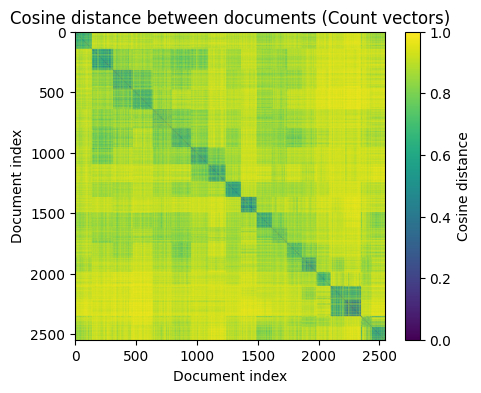

Euclidean distance matrix shape: (2548, 2548)


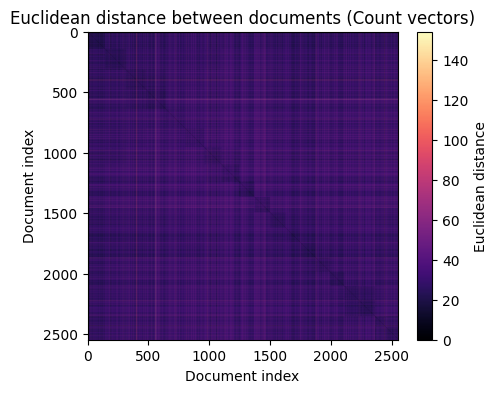

In [10]:
# For speed / clarity in visuals, you can optionally sample fewer docs
# Here we use all documents; if it is slow, we can later sub-sample.
X_count = X.toarray()  # convert sparse to dense for distance functions

print("Count matrix shape (dense):", X_count.shape)

# 1. Cosine distance matrix
cosine_dist_count = cosine_distances(X_count)
print("Cosine distance matrix shape:", cosine_dist_count.shape)

plt.figure(figsize=(5, 4))
plt.imshow(cosine_dist_count, aspect='auto', cmap='viridis')
plt.colorbar(label="Cosine distance")
plt.title("Cosine distance between documents (Count vectors)")
plt.xlabel("Document index")
plt.ylabel("Document index")
plt.show()

# 2. Euclidean distance matrix
euclid_dist_count = euclidean_distances(X_count)
print("Euclidean distance matrix shape:", euclid_dist_count.shape)

plt.figure(figsize=(5, 4))
plt.imshow(euclid_dist_count, aspect='auto', cmap='magma')
plt.colorbar(label="Euclidean distance")
plt.title("Euclidean distance between documents (Count vectors)")
plt.xlabel("Document index")
plt.ylabel("Document index")
plt.show()


PCA output shape: (2548, 2)


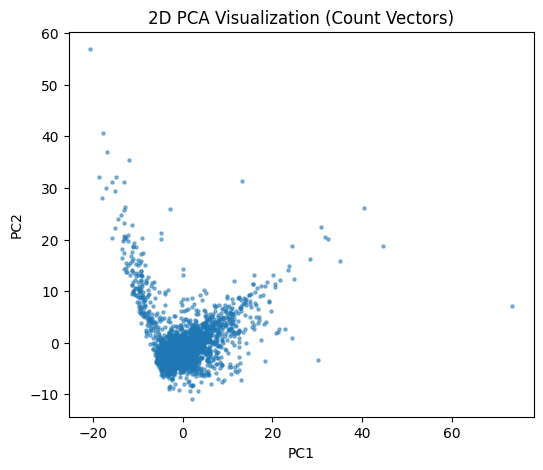

In [11]:
# Convert count_matrix to array if not already done
X_count = X.toarray()

# 1. Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
X_count_pca = pca.fit_transform(X_count)

print("PCA output shape:", X_count_pca.shape)

# 2. Scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(X_count_pca[:, 0], X_count_pca[:, 1], s=5, alpha=0.5)
plt.title("2D PCA Visualization (Count Vectors)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

PCA-50 shape: (2548, 50)
t-SNE output shape: (2548, 2)


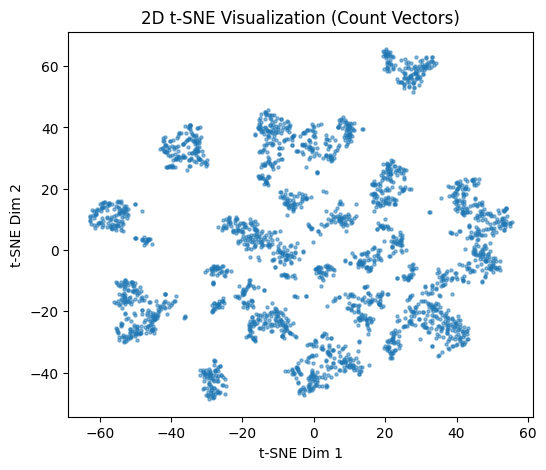

In [12]:
# 1. PCA to 50 components for t-SNE speed and stability
pca50 = PCA(n_components=50)
X_count_pca50 = pca50.fit_transform(X_count)

print("PCA-50 shape:", X_count_pca50.shape)

# 2. t-SNE on PCA-50
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    init='random',
    random_state=42
)

X_count_tsne = tsne.fit_transform(X_count_pca50)

print("t-SNE output shape:", X_count_tsne.shape)

# 3. Scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(X_count_tsne[:, 0], X_count_tsne[:, 1], s=5, alpha=0.5)
plt.title("2D t-SNE Visualization (Count Vectors)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


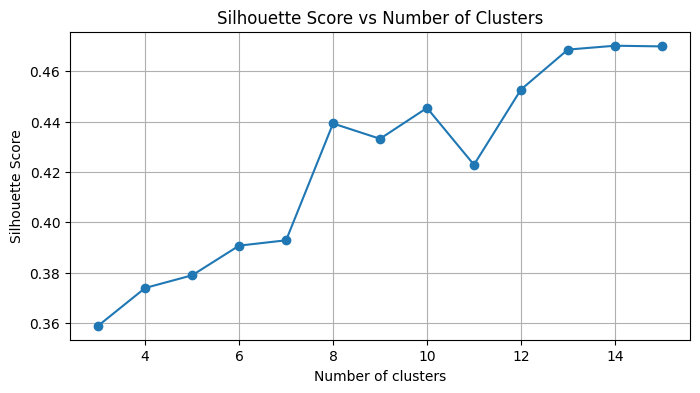

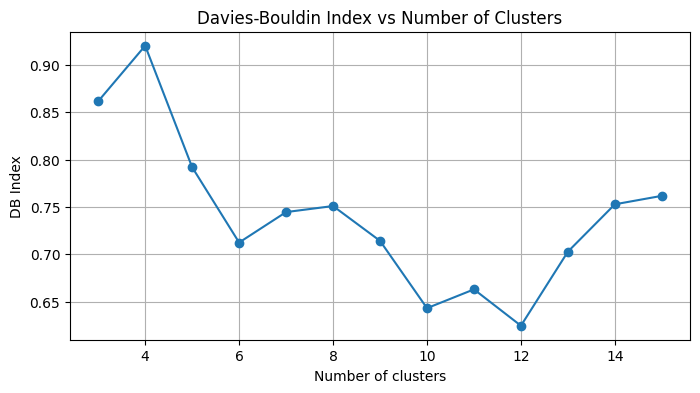

Silhouette Scores: [0.3589441478252411, 0.3739393949508667, 0.3789759576320648, 0.39074718952178955, 0.3928723633289337, 0.4392622709274292, 0.433188796043396, 0.44545087218284607, 0.42287322878837585, 0.45271700620651245, 0.46861159801483154, 0.4701470136642456, 0.46987617015838623]
Davies-Bouldin Scores: [0.8617095722661197, 0.9203799639046362, 0.7920021273437795, 0.7124311833363571, 0.7446040290898983, 0.7509975448910219, 0.7142004271431625, 0.6430818445038661, 0.6629367362219408, 0.6245291958479932, 0.7028019886794906, 0.7528266197463045, 0.7617647716953225]


In [13]:
sil_scores = []
db_scores = []
cluster_range = range(3, 16)

for k in cluster_range:
    # Create clustering model
    model = AgglomerativeClustering(n_clusters=k, linkage="complete")

    # Fit on t-SNE coordinates
    labels = model.fit_predict(X_count_tsne)

    # Compute metrics
    sil = silhouette_score(X_count_tsne, labels)
    db = davies_bouldin_score(X_count_tsne, labels)

    sil_scores.append(sil)
    db_scores.append(db)

# Plot both metrics
plt.figure(figsize=(8,4))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(cluster_range, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("DB Index")
plt.grid(True)
plt.show()

print("Silhouette Scores:", sil_scores)
print("Davies-Bouldin Scores:", db_scores)

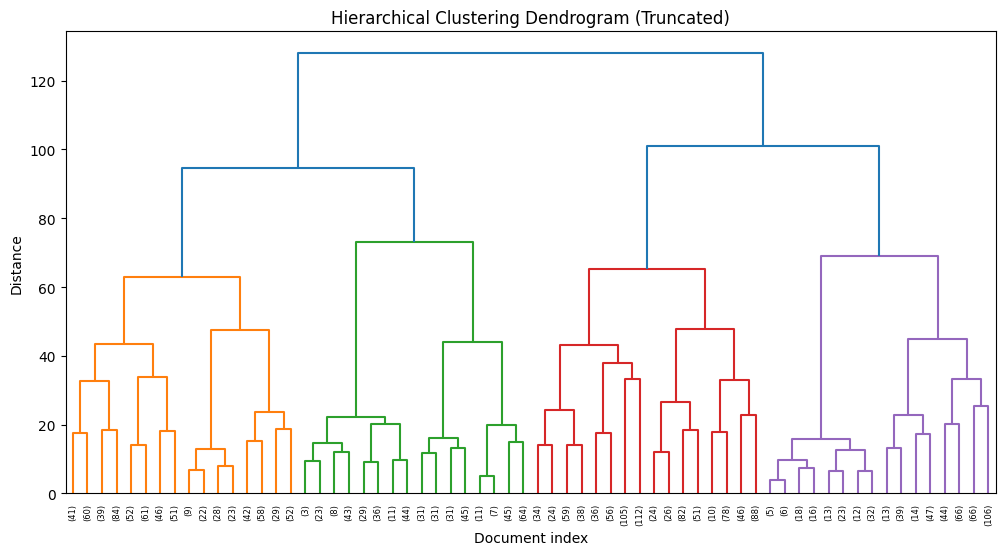

In [15]:
# Use 'complete' linkage as in earlier clustering
Z = linkage(X_count_tsne, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # only top levels
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Document index")
plt.ylabel("Distance")
plt.show()

In [16]:
k_optimal = 15  # chosen based on Silhouette + DB Index

model_15 = AgglomerativeClustering(
    n_clusters=k_optimal,
    linkage="complete"   # same as dendrogram
)

# Fit model on t-SNE coordinates
cluster_labels = model_15.fit_predict(X_count_tsne)

print("Unique clusters found:", len(set(cluster_labels)))
print("Sample of first 20 cluster labels:", cluster_labels[:20])

Unique clusters found: 15
Sample of first 20 cluster labels: [0 5 5 2 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5]


In [18]:
df["Cluster_15"] = cluster_labels

# 2. Quick sanity check: how many docs per cluster?
cluster_counts = df["Cluster_15"].value_counts().sort_index()
print("Documents per cluster (k = 15):")
print(cluster_counts)

# 3. Look at a few sample rows with clusters
print("\nSample rows with cluster labels:")
display(df[["RollNo", "Topic", "topic_analysis_unified_lemmatized", "Cluster_15"]].head(10))

# 4. Save to CSV for further analysis / submission
output_file = "Exercise9_Clustered_TSNE_CountVectors_k15.csv"
df.to_csv(output_file, index=False)

print("\nSaved clustered data as:", output_file)

Documents per cluster (k = 15):
Cluster_15
0     210
1     282
2     217
3     222
4     113
5     224
6     155
7     127
8     183
9      82
10    197
11    125
12    138
13    181
14     92
Name: count, dtype: int64

Sample rows with cluster labels:


,RollNo,Topic,topic_analysis_unified_lemmatized,Cluster_15
0,88,Level of measurement,level measurement learned nominal ordinal inte...,0
1,159,Levels of measurements,level measurement level measurement nominal di...,5
2,98,Levels of Measurement,level measurement level measurement also calle...,5
3,109,types of arithmetic and statistical operation ...,type arithmetic statistical operation performe...,2
4,115,Statistical Measurement Levels and Classes of ...,statistical measurement level class machine le...,5
5,138,Levels of Measurement,level measurement today class learnt level mea...,5
6,83,Level of Measurement,level measurement four level measurement nomin...,5
7,116,Stastics-Level of Measurement,stastics level measurement nominal data catego...,5
8,104,Levels Of Measurement,level measurement learnt main level measuremen...,5
9,129,Encoding,encoding data nominal level measurement inhere...,5



Saved clustered data as: Exercise9_Clustered_TSNE_CountVectors_k15.csv


In [20]:
for c in range(15):
    print(f"\n=== Cluster {c} ===")
    sample_texts = df[df["Cluster_15"] == c]["topic_analysis_unified_lemmatized"].head(5)
    for t in sample_texts:
        print("-", t[:200])



=== Cluster 0 ===
- level measurement learned nominal ordinal interval ratio variable unit differ operation performed whether discrete continuous
- machine learning machine learning process picking pattern based data pattern picked make prediction decision without hard coding decision example spam filter would contain pattern spam message would u
- descriptive analysis linear regression regression statistical method used solve supervised machine learning problem predicted value continuous function one feature common one linear regression decisio
- categorization data categorization data may seem trivial indeed depth thought quantity temperature nuance depending upon unit like sometimes useful look linear quantity interval sometimes multiplicati
- level measurement learnt like nominal ordinal interval ratio differ type data represent also mathematical operation used also whether ordered whether discrete

=== Cluster 1 ===
- loss function linear regression summary today lecture learned 